# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Human Gait Treadmill Data ##

the time series represents the posterior-anterior direction force detected by the sensor on a split-belt treadmill, which operates at four different running speeds: 0.6, 0.7, 0.8, and 0.9 m/s

m = 100 (one cycle in the data)

The results for d=1 are the same as in the Robust Time Series Chain Discovery with Incremental Nearest Neighbors.

In [2]:
# Parameter
use_case = "chains"
data_name = "humangaittreadmill"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "ts")

### Experiments ###

In [3]:
# Hyperparameter
target_w = 100
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case)

Calculated MP for: w=100, m=100, d=1
Calculated MP for: w=101, m=51, d=2
Calculated MP for: w=100, m=34, d=3
Calculated MP for: w=101, m=26, d=4
Calculated MP for: w=101, m=21, d=5
Calculated MP for: w=97, m=17, d=6
Calculated MP for: w=99, m=15, d=7
Calculated MP for: w=97, m=13, d=8
Calculated MP for: w=100, m=12, d=9
Calculated MP for: w=101, m=11, d=10


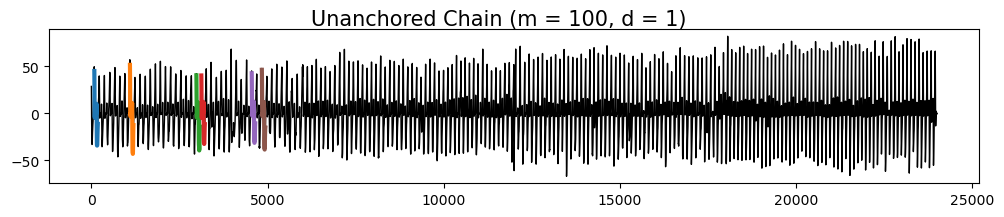

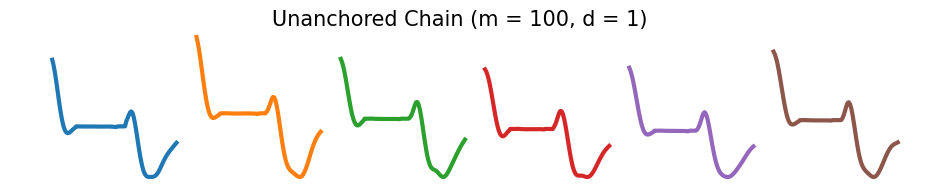

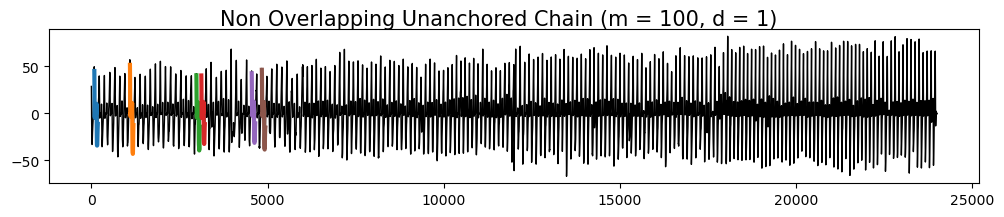

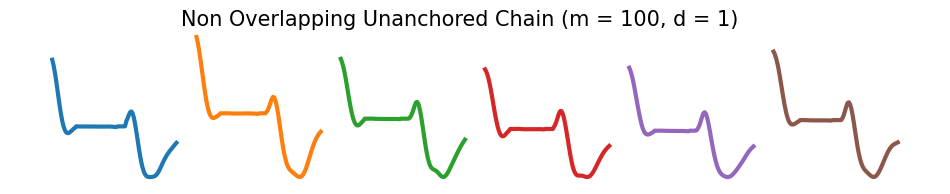

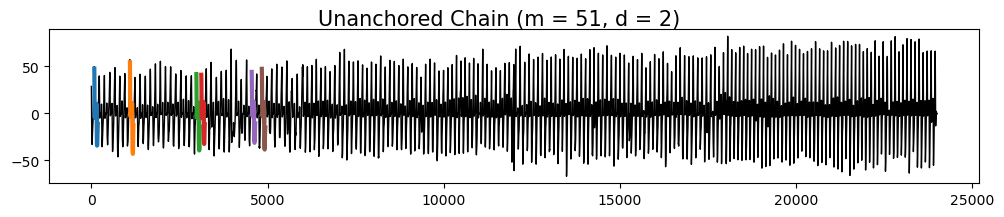

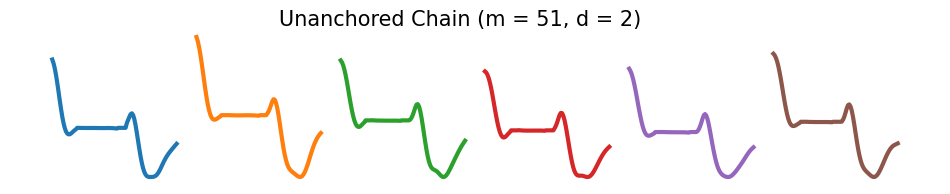

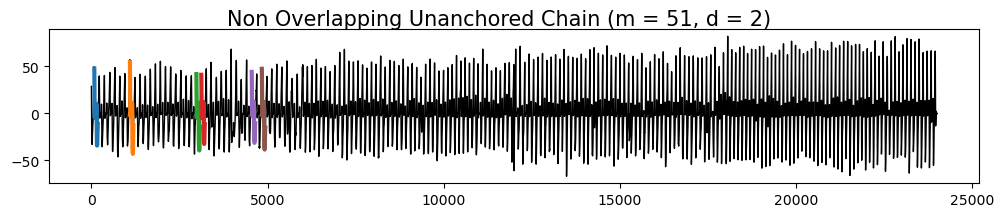

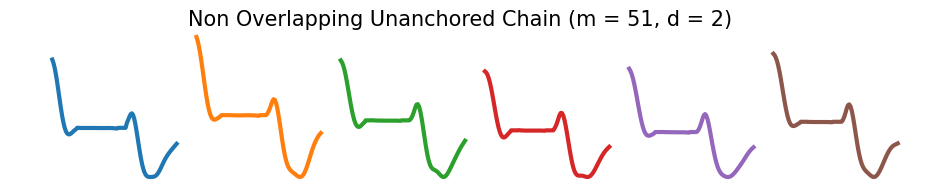

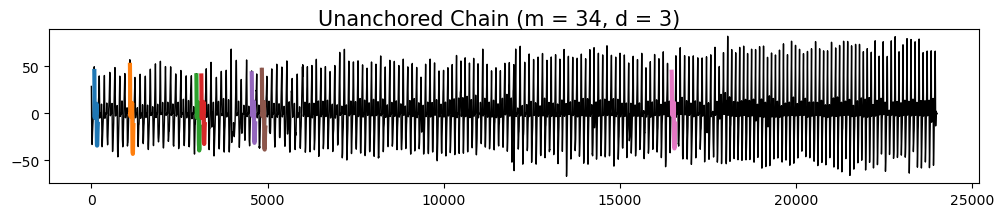

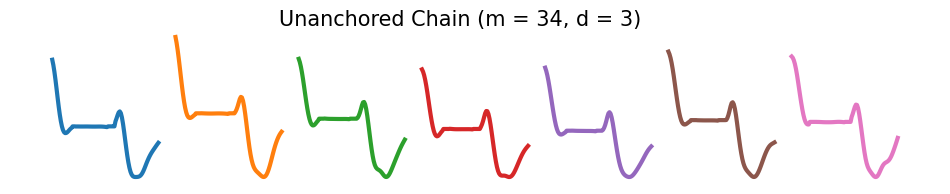

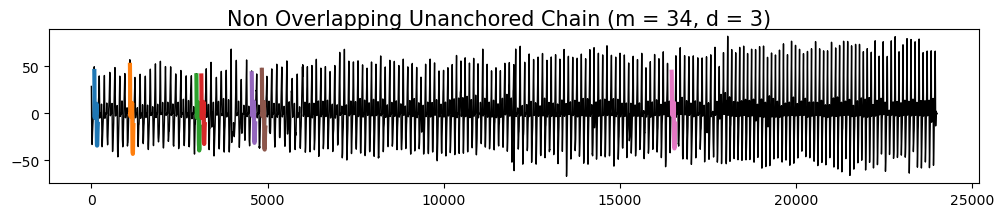

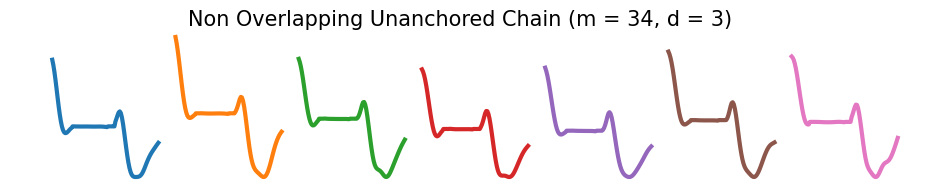

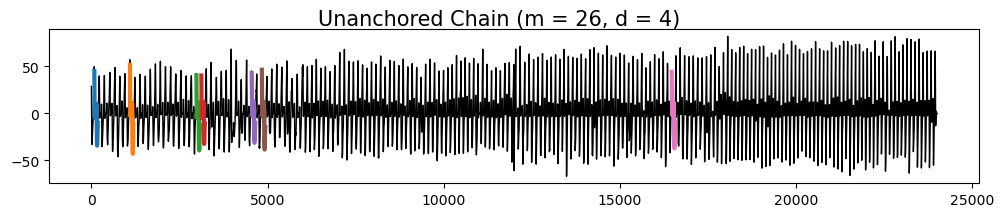

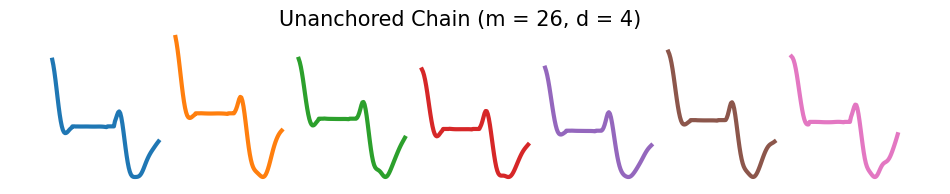

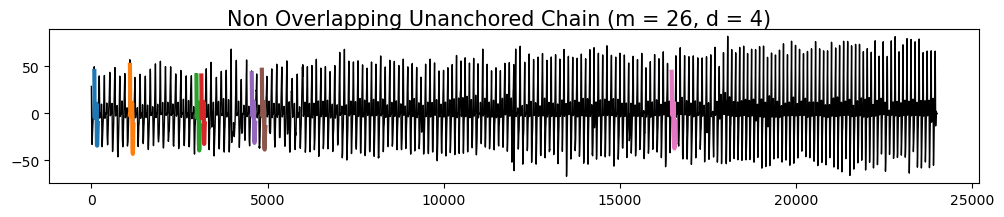

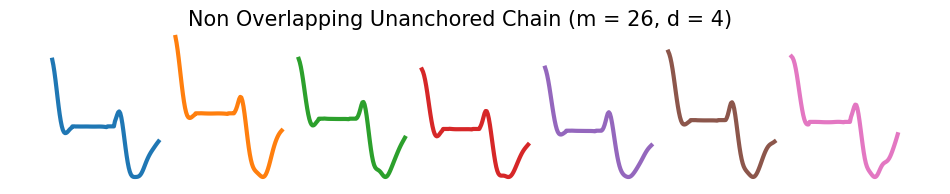

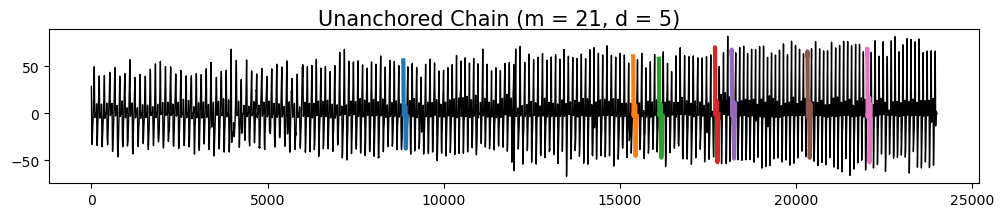

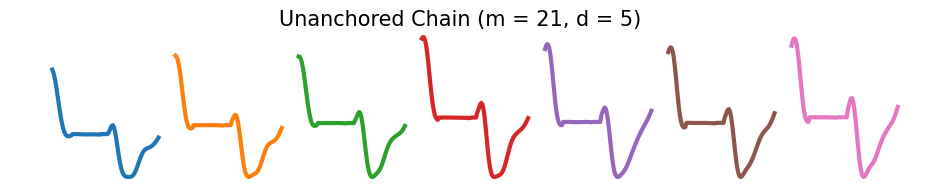

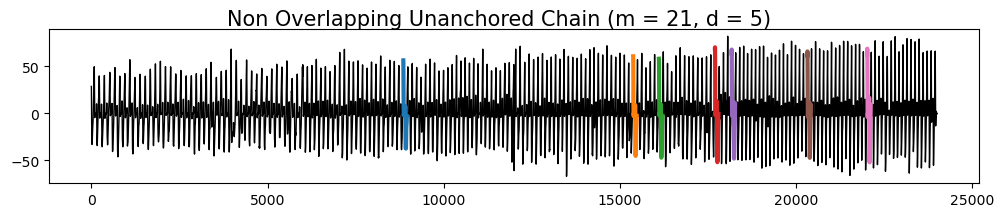

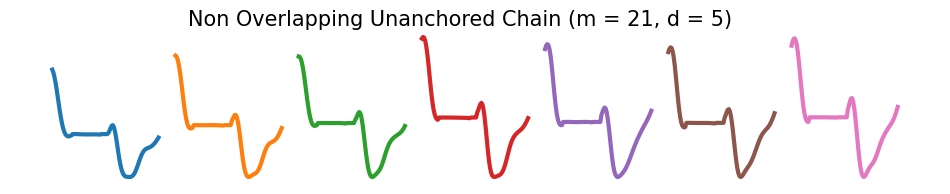

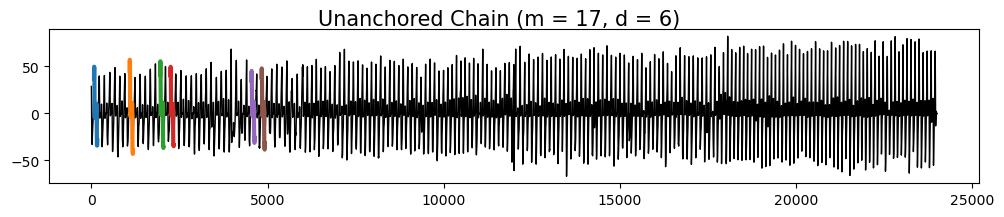

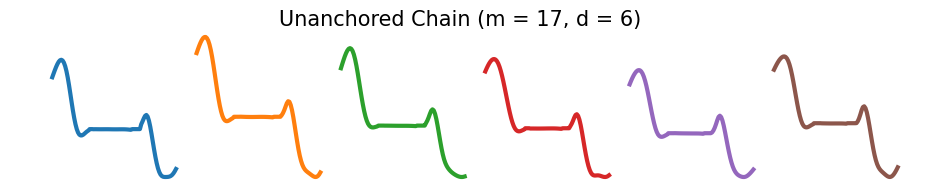

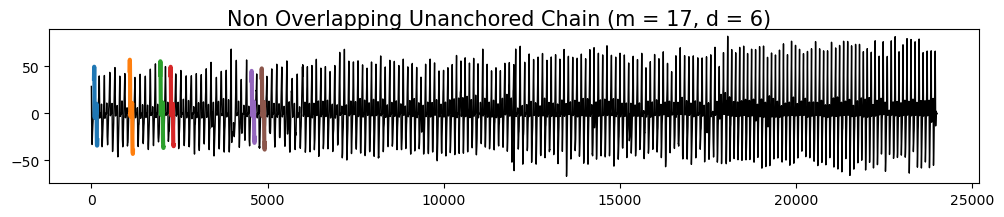

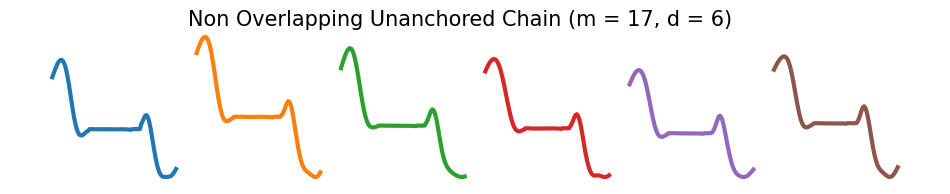

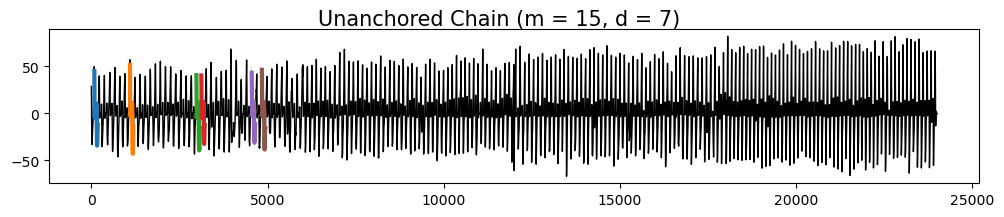

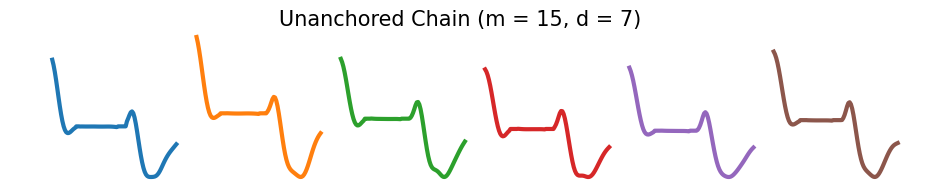

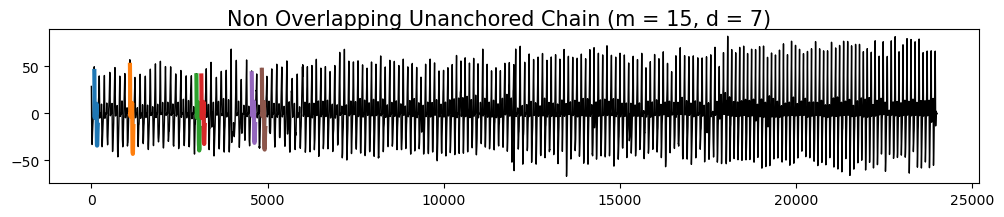

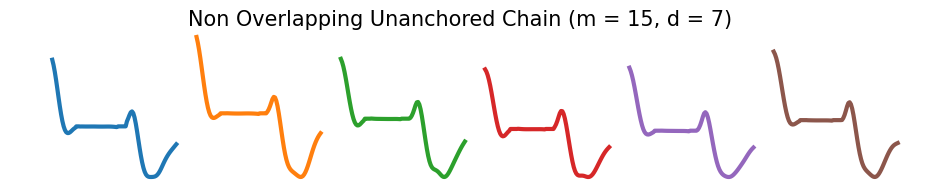

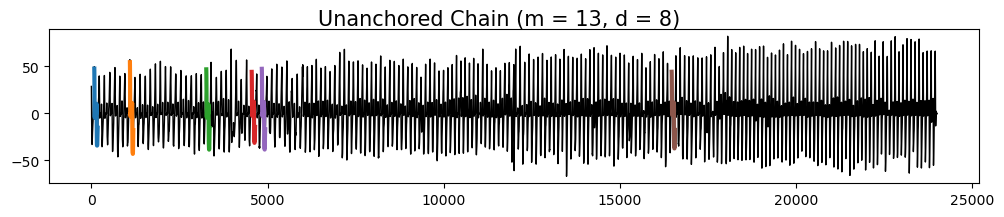

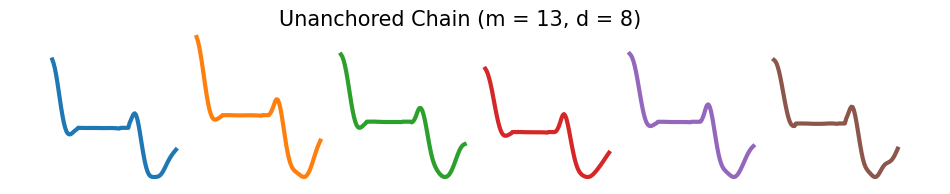

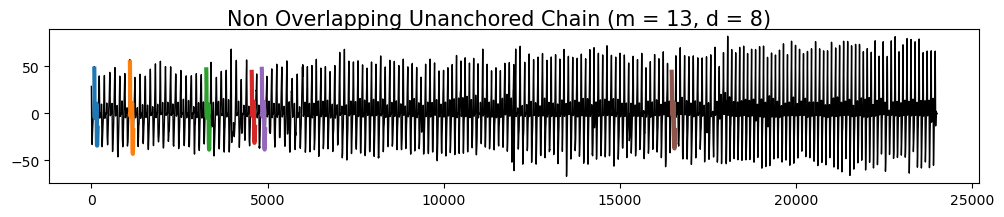

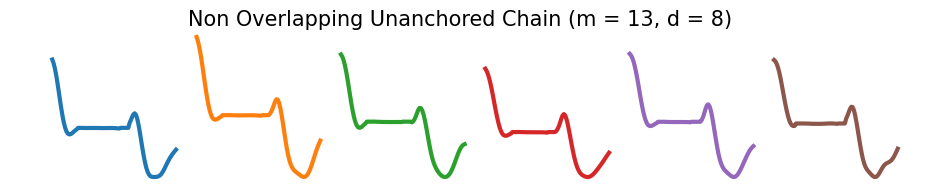

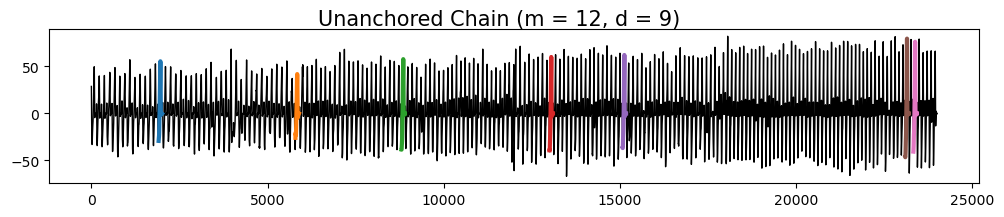

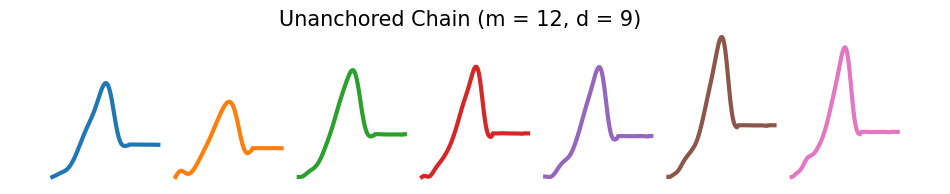

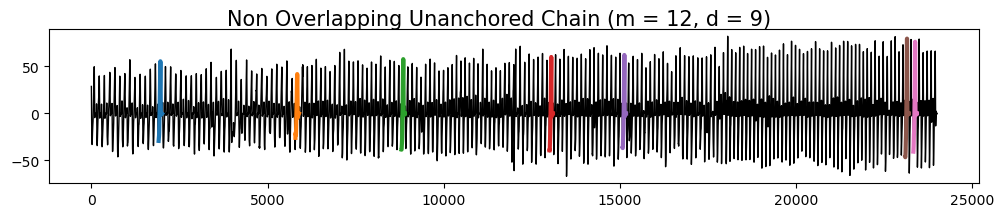

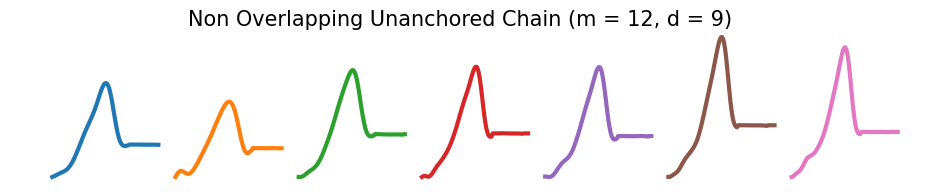

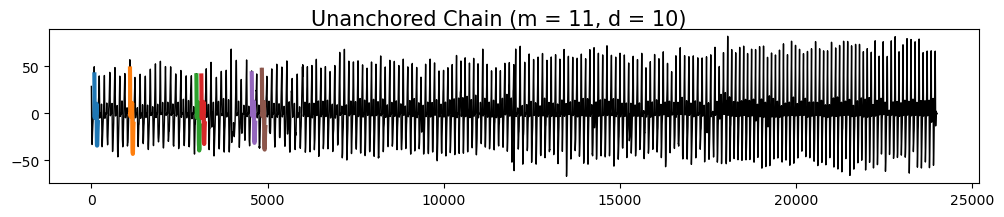

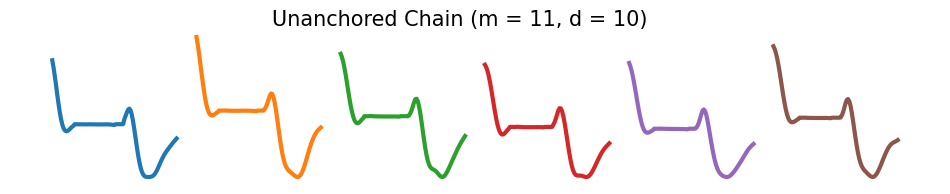

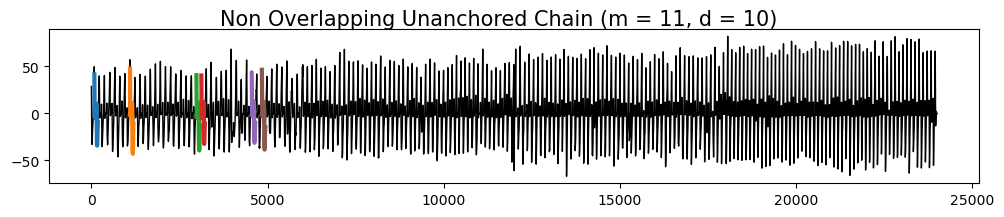

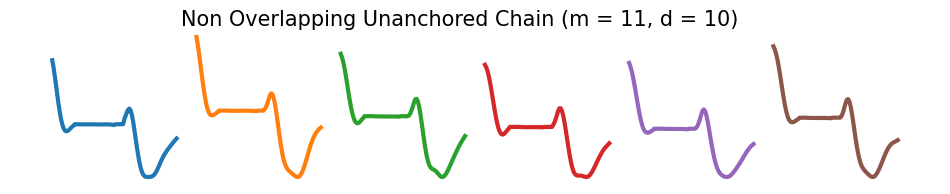

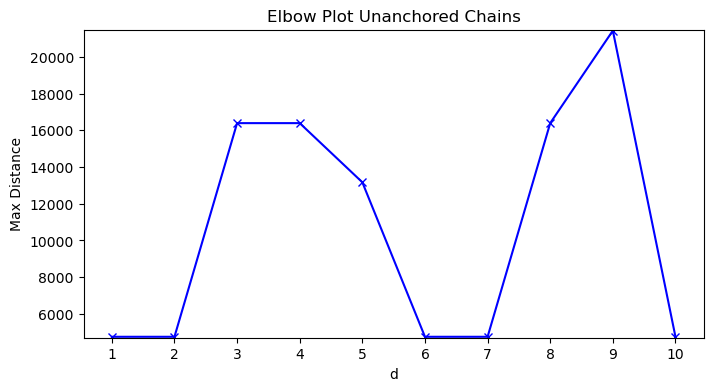

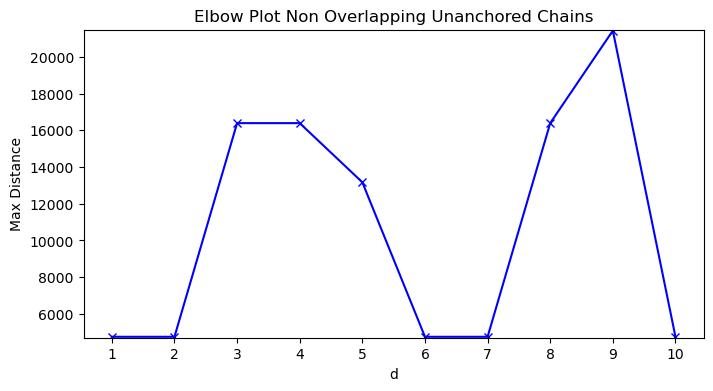

In [5]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)